#Опис процесу
Даний файл містить модель генерації трансмембранного струму м'язевою клітиною у відповідь на дію речовини-активатора — карбахолу. Активатор вводився з поступовим зростанням концентрації, що спостерігається на графіку, як стрибкоподібне збільшення сили струму (див. нижче). Після кожного додавання карбахолу, сила струму поступово наростала, а потім виходила на плато (стаціонарне значення струму) і не змінювалась до введення нової концентрації активатора. 

#Опис моделі

Сила струму $I$ обчислюється за формулою:

\begin{equation}
I  = I_{max} m(t, c)\\
\end{equation}


Де  $I_{max}$ — максимально можлива сила струму, $m(t, c)$ - провідність мембрани клітини в певний момент часу $t$ та при певній концентрації карбахолу $c$. 

Залежність провідності $m(t,c)$ від часу та концентрації знаходимо із диференційного рівняння: 


\begin{equation}
\frac{dm}{dt} = \frac{m_0(c) - m(t,c)}{\tau(c)}
\end{equation}

Де $m_0(c)$ — стаціонарне значення провідності для концентрації активатора $c$, $\tau(c)$ — часова константа наростання сили струму для певної концентрації активатора $c$.

Функцію $m_0(c)$ знаходимо за формулою: 

\begin{equation}
m_0(c) = \frac{1}{(1+{(\frac{c}{b})}^a)(1+{(\frac{c}{e})}^d)}
\end{equation}

Де $a,b,d,e$ — деякі параметри, $c$ — концентрація активатора.

Функцію  $\tau(c)$ обчислюмо рівнянням: 

\begin{equation}
\tau(c) = \frac{a}{(1 + exp{({\frac{c+b_1}{c_1}}^2)})(1 + exp{{(\frac{c+b_2}{c_2})}})}
\end{equation}

Де $a, b_1, b_2, c_1, c_2$ — деякі параметри, $c$ — концентрація активатора.

#Послідовність дій

Суть роботи зводиться до того, щоб визначити параметри для функцій $m_0(c)$ та $\tau(c)$ і за попередніми рівняннями побудувати програму для обчислення процесу генерації струму м'язевою клітиною. Параметри функцій будемо визначати з експериментальних даних за допомогою методу диференційної еволюції.  

In [0]:
# імпортуємо модулі
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.optimize import least_squares
from scipy.optimize import minimize

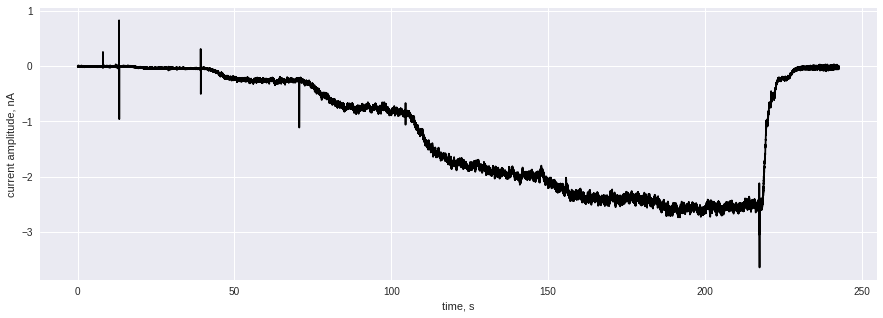

In [109]:
# Зображаємо графік зміни струму в часі
# В місцях, де сила струму збільшувалась стрибкоподібно, відбувалось додавання активатора
# Вводились такі концентрації речовини: 1, 3, 10, 30, 100, 300 мМ
# Зверніть увагу на фази наростання та плато сили струму, вони змінюються для кожної концентрації активатора

df = pd.read_csv('Data/cell_1.csv')

%matplotlib inline

x = df.iloc[:,0].values
y = df.iloc[:,1].values
plt.figure(figsize = (15,5))
plt.plot(x,y, color = 'black')
plt.xlabel('time, s')
plt.ylabel('current amplitude, nA')
plt.show()

In [0]:
# відкриваємо файл, який містить стаціонарні значення сили струму
# данні нормовані до одиниці і відповідають стаціонарній провідності m0
stacionar  = pd.read_excel('Data/stacionar.xlsx') 

In [70]:
stacionar.head(3)

,Cell number,0,1 mM,3 mM,10 mM,30 mM,100 mM,300 mM,400
0,1,0,0.016279,0.103101,0.319380,0.768992,0.935659,1,1
1,4,0,0.081719,0.431110,0.654779,0.814778,0.915908,1,1
2,5,0,0.016136,0.130106,0.312426,0.705470,0.794198,1,1


In [0]:
stacionar_current = pd.read_excel('Data/stacionar.xlsx').iloc[0,1:].values # збарігаємо в цій змінній стаціонарні значення струму для нашої клітини
agonist_concentration = np.array([0,1,3,10,30,100,300,400]) # концентрації активатора, які додавались до клітини


In [0]:
def m0(p,x): # m0 - модель стаціонарного значення провідності 
  b,c,d,e,f = p
  h = 1/(1+(x/b)**c)*(1 - d/(1+(x/e)**f))
  return h

In [73]:
''' 
Визначаємо параметри для функції m0 за допомогою методу диференційної еволюції.
Цей метод дозволяє підібрати такі параметри рівняння, які краще всього описують експериментальні дані.
Метод диференційної еволюції кожного разу видає різні значення параметрів функції.
Тому доцільно зображати графік функції та експериментальних результатів. Якшо вони сильно відрізняються
слід перезапустити алгорит, ще раз, доки він не підбере потрібні параметри.

'''

def ev(p):
  
  global agonist_concentration
  global stacionar_current
  
  h = m0(p,agonist_concentration)
  
  return sum((stacionar_current-h)**2)

bonds = [(0,100),(-10,10),(0,1),(0,100),(-10,10)] # межі в яких алгоритм підбиратиме параметри для моделі
m0_result = differential_evolution(ev, bonds)
m0_result.x # отримані параметри

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


array([12.2279699 , -1.34072128,  0.26108763, 17.35163747,  9.90739084])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


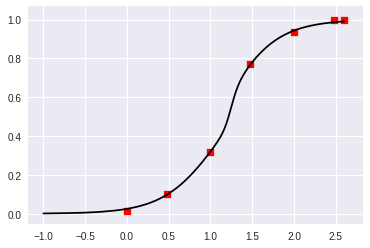

R squared:  0.9996902468393539


In [74]:
# Зображаємо на графіку нашу модель (чорна крива) 
# та ексериментальні дані (червоні квадрати) для стаціонарної провідності
# використовуємо напівлогарифмічну шкалу, аби краще візуалізувати процес

plt.plot(np.log10(np.arange(0,400,0.1)),m0(m0_result.x,np.arange(0,400,0.1)), c = 'black')
plt.scatter(np.log10(agonist_concentration),stacionar_current, marker = 's', c = 'red')
plt.show()

# обчислюмо значення "ер квадрату", який показує точність моделі
h = m0(m0_result.x,agonist_concentration)
SS_tot = (stacionar_current-stacionar_current.mean())**2
SS_reg=np.sum((h-stacionar_current.mean())**2)
SS_res=np.sum((stacionar_current-h)**2)
er_sqr = 1 - SS_res/(SS_res+SS_reg)
print('R squared: ',er_sqr)

In [75]:
df_time = pd.read_excel('Data/aplication_time.xlsx') # завантажуємо таблицю часу дадавання активатора до клітини
df_time.head(5)

,Cell No.,1 μM,3 μM,10 μM,30 μM,100 μM,300 μM
0,1,13.2,39.2,70.7,104.6,147.9,184.5
1,2,8.0,29.8,50.9,77.8,102.4,-
2,3,9.1,24.5,41.9,62.4,85.6,-
3,4,10.9,33.2,52.0,76.7,97.0,126.8
4,5,11.4,30.5,61.8,94.0,124.4,143.6


In [76]:
a_t = df_time.iloc[0,1:].values # обираємо час додавання активатора саме для нашої клітини
a_t = a_t.astype(float)
a_t = np.append(a_t,200)
a_t # час додавання активатора

array([ 13.2,  39.2,  70.7, 104.6, 147.9, 184.5, 200. ])

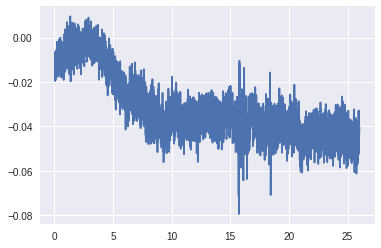

In [83]:
# зображаємо ділянку графіка між додаванням попередньої та наступної концентрації активатора
tab = 50 # додаємо відступи аби в наші данні не потрапили шуми, які виникають на початку додавання активатора
x = df['Time (s)'].loc[a_t[0]*1000+tab:a_t[1]*1000].values - a_t[0]
y = df['Trace #1 (nA)'].loc[a_t[0]*1000+tab:a_t[1]*1000].values
plt.plot(x,y)
plt.show()

In [0]:
'''
для того, щоб визначити залежність часу наростання струму від концентрації агоністу, 
спочатку слід визначити експоненційні константи часу наростання
для кожної концентрації активатора, а потім
побудувати їх залежність від концентрації цієї речовини
'''
# модель для обрахунку експоненційні константи часу наростання

def tau_model(x,p):
  a,t,c = p
  return a*np.exp(-x/t)+c
  

In [93]:
# знову визначаємо параметри методом диференційної еволюції

def ev(p):
    global x
    global y

    h = tau_model(x,p)
    return sum((h-y)**2)/y.size

bounds = [(-100000,100000), (-20,20), (-100000,100000)]
tau_model_results=differential_evolution(ev, bounds)
print('model parameters: ',tau_model_results.x) # отримані параметри, нам потрібен 2-й

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys


model parameters:  [ 0.05033592  7.4929352  -0.04481219]


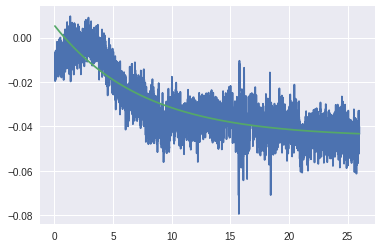

R squared:  0.7875205616638703


In [94]:
# зображаємо модель та експериментальні дані

h = tau_model(x,tau_model_results.x) 
plt.plot(x,y,x,h)
plt.show()

# обчислюємо точність

SS_tot = (y-y.mean())**2
SS_reg=np.sum((h-y.mean())**2)
SS_res=np.sum((y-h)**2)
er_sqr = 1 - SS_res/(SS_res+SS_reg)
print('R squared: ',er_sqr)

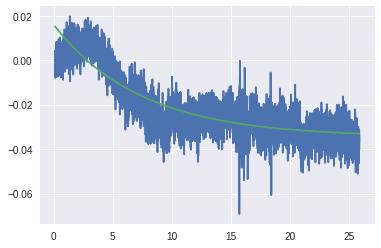

R squared:  0.7884885606990186


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


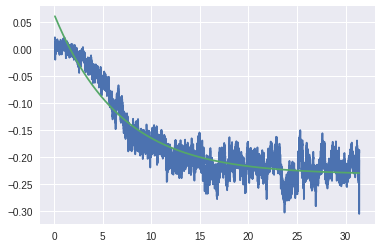

R squared:  0.9138846388023176


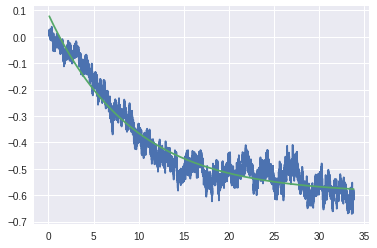

R squared:  0.9459499052700904


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


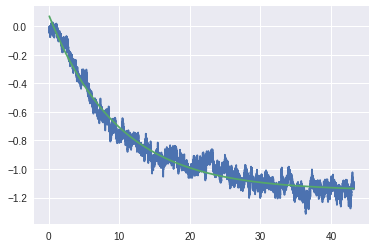

R squared:  0.9744268441146176


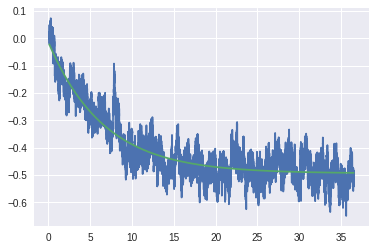

R squared:  0.8429551458122326


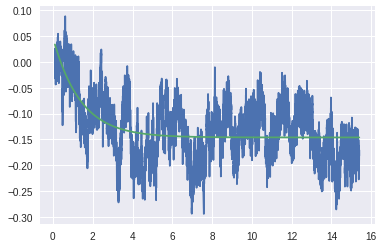

R squared:  0.338577172350772


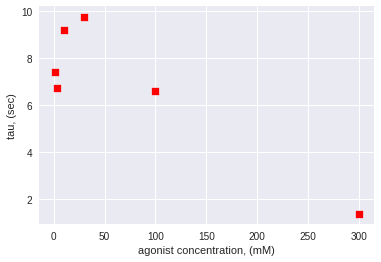

In [95]:
'''
Тепер, коли ми пересвідчились, що алгоритм працює правильно,
визначаємо експоненційні константи часу наростання на інших ділянках процесу
'''

tab = 100
back = 100
tau_model_results = [] # в цей список додаватимемо експоненційні константи часу наростання
conc= [1,3,10,30,100,300]
bounds = [(-300,300), (-40,40), (-300,300)]

for i in range(6):
  
    if i < 6:
      x = df['Time (s)'].loc[a_t[i]*1000+tab:a_t[i+1]*1000-back].values-a_t[i]
      y = df['Trace #1 (nA)'].loc[a_t[i]*1000+tab:a_t[i+1]*1000-back].values - df['Trace #1 (nA)'].loc[a_t[i]*1000]
    else:
      x = df['Time (s)'].loc[a_t[i]*1000+tab:a_t[i+1]*1000-8000].values-a_t[i]
      y = df['Trace #1 (nA)'].loc[a_t[i]*1000+tab:a_t[i+1]*1000-8000].values - df['Trace #1 (nA)'].loc[a_t[i]*1000]
    
    tau_model_result=differential_evolution(ev, bounds) # отримуємо параметри
    tau_model_results.append(tau_model_result.x[1]) # додаємо до списку наші параметри
    
    # зображаємо графік для кожної ділянки процесу
    
    h = tau_model(x,tau_model_result.x)
    plt.plot(x,y,x,h)
    plt.show()
    
    # обчислюємо точність
    
    SS_tot = (y-y.mean())**2
    SS_reg=np.sum((h-y.mean())**2)
    SS_res=np.sum((y-h)**2)
    er_sqr = 1 - SS_res/(SS_res+SS_reg)
    
    print('R squared: ',er_sqr)

# зображаємо, як змінюються часові константи залежно від концентрації агоністу

plt.scatter(conc,tau_model_results, c = 'red', marker = 's')

plt.xlabel('agonist concentration, (mM)')
plt.ylabel('tau, (sec)')
plt.show()

In [0]:
# тепер будуємо модель обчислення часової константи наростання сили струму залежно від концентрації активатора

def time_constant(p,conc):
    a,b1,c1,b2,c2 = p
    return a/((1 + np.exp((conc+b1)/c1)**2)*(1+np.exp(-(conc+b2)/c2)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':


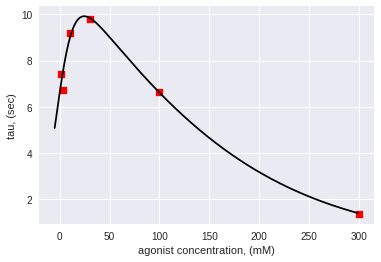

R squared:  0.981594281614006
model parameters:  [ 25.30074176  15.07989506 221.57133792   2.1674731    8.91500051]


In [98]:
# підбираємо параметри моделі методом диференційної еволюції 

%matplotlib inline

conc= [1,3,10,30,100,300] # концентрації активатора 
tau = np.array(tau_model_results) # експоненційні константи часу наростання для кожної концентрації

def f(pa):
    global conc
    global tau
    a,b1,c1,b2,c2 = pa
    h =  a/((1 + np.exp((conc+b1)/c1)**2)*(1+np.exp(-(conc+b2)/c2)))
    return sum((h-tau)**2)

bounds = [(-np.inf, np.inf), (-np.inf, np.inf), (-np.inf, np.inf)]
bounds = [(-1000,1000),(-1000,1000),(-1000,1000), (-1000,1000), (-1000,1000)]
ev=differential_evolution(f, bounds)

a,b1,c1,b2,c2 = ev.x
h = a/((1 + np.exp((conc+b1)/c1)**2)*(1+np.exp(-(conc+b2)/c2)))
plt.scatter(conc,tau,color = 'red', marker = 's')

# обчислюємо точність

SS_reg=np.sum((h-tau.mean())**2)
SS_res=np.sum((tau-h)**2)
er_sqr = 1 - SS_res/(SS_res+SS_reg)

# зображаємо нашу модель із експериментальними даними

conc = np.arange(-5,300)
h =  a/((1 + np.exp((conc+b1)/c1)**2)*(1+np.exp(-(conc+b2)/c2)))
plt.plot(conc,h,color = 'black')
plt.xlabel('agonist concentration, (mM)')
plt.ylabel('tau, (sec)')
plt.show()

print('R squared: ',er_sqr) # точність
print('model parameters: ',ev.x) # параметри нашої моделі


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


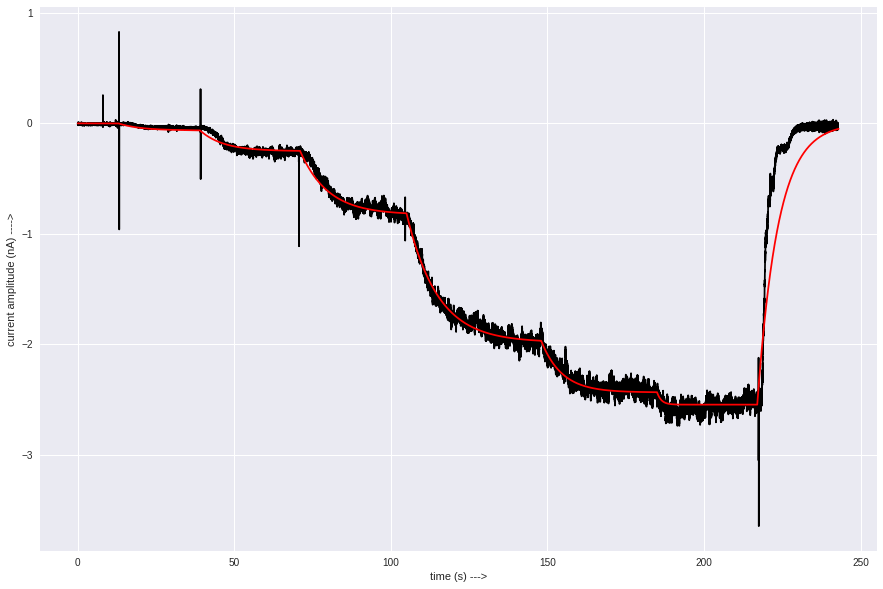

In [110]:
'''
Тепер коли ми отримали всі потрібні нам параметри можемо обчислювати загальну модель генерації струму.
Диференційне рівняння розв'язуватимемо не аналітично а за допомогою наближеного обчислення, вважаючи, що
приріст аргумента dt = 0.025

'''


%matplotlib inline
from __future__ import division
from matplotlib import pylab as pl
import numpy as np

dt= 0.025
time=np.arange(0,243,dt) # створюємо масив, який містить шкалу часу від 0 до 243 с, із кроком 0.025
I=np.zeros(len(time))    # створюємо пустий масив для сили струму, довжиною як масив time
p = m0_result.x          # зберігаємо параметри для моделі стаціонарної провідності


c0=0.0                   # початкова концентрація
I_max=-2.580             # максимальна сила струму
m=0                      # початкове значення провідності


c_s=np.zeros(len(time))  # створюємо масив точок концентрації  

                         
# задаємо для його часових проміжків значення концентрацій активатора, які додавались в експерименті

c_s[(0*40):(13*40)]=[c0]
c_s[(13*40):(39*40)]=[1]
c_s[(39*40):(71*40)]=[3]
c_s[(71*40):(105*40)]=[10]
c_s[(105*40):(148*40)]=[30]
c_s[(148*40):(185*40)]=[100]
c_s[(185*40):(217*40)]=[300]


for i in range(1,len(time)): # обчислюємо значення провідності та сили струму в кожен момент часу
    
    c=c_s[i]
    m+=dt*(m0(m0_result.x,c)-m)/time_constant(ev.x,c)
    I[i]=I_max*m
       
plt.figure(figsize = (15,10))    
plt.plot(df.iloc[:,0].values,df.iloc[:,1].values,color = 'black')    
pl.plot(time,I, color = 'red')
pl.xlabel("time (s) --->")
pl.ylabel("current amplitude (nA) ---->")

pl.show()

In [111]:
# обчислюємо точність нашої моделі

SS_reg=np.sum((I-df.iloc[:,1].mean())**2)
SS_res=np.sum((df.iloc[:,1].values[::25]-I[:-11])**2)
er_sqr = 1 - SS_res/(SS_res+SS_reg)
print('R squared: ',er_sqr)

R squared:  0.9829353917920696


# Висновки
Модель виявилась досить точною для опису генерації струму клітиною у відповідь на дію активатора. 